# Map 6 - Fault
This map is from Bennison et al. (2011). It has a fault that offsets units A-C

In [1]:
# Import plotting libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

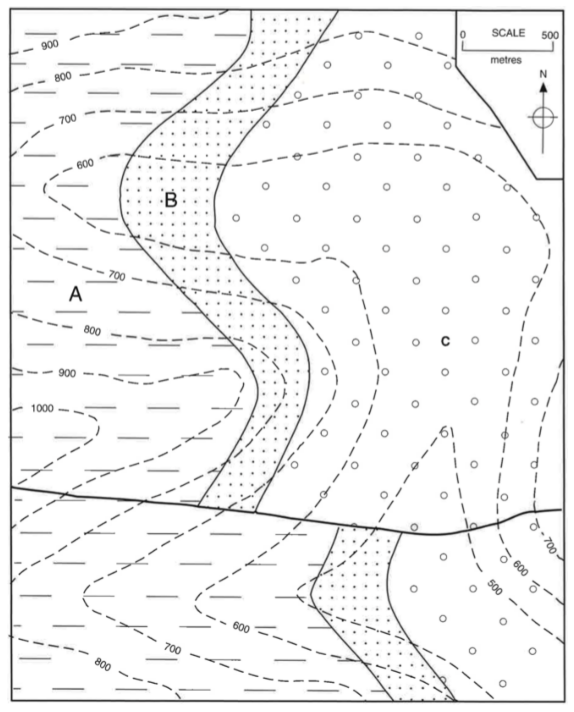

In [2]:
# Display map
img = mpimg.imread('map6.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

In [3]:
# Import other required libraries
import geopandas as gpd
import rasterio
import gemgis as gg
import os

In [4]:
# Get current directory
current_directory = os.getcwd()

In [5]:
# Read the topographic contours
topo = gpd.read_file(filename = current_directory+"/contours/contours.shp")
topo.head()

,X,Y,Z,geometry
0,2663.93,2.48,500,POINT (2663.926 2.478)
1,2618.03,41.96,500,POINT (2618.027 41.960)
2,2566.79,93.89,500,POINT (2566.794 93.885)
3,2509.32,141.75,500,POINT (2509.315 141.748)
4,2455.20,188.54,500,POINT (2455.205 188.536)


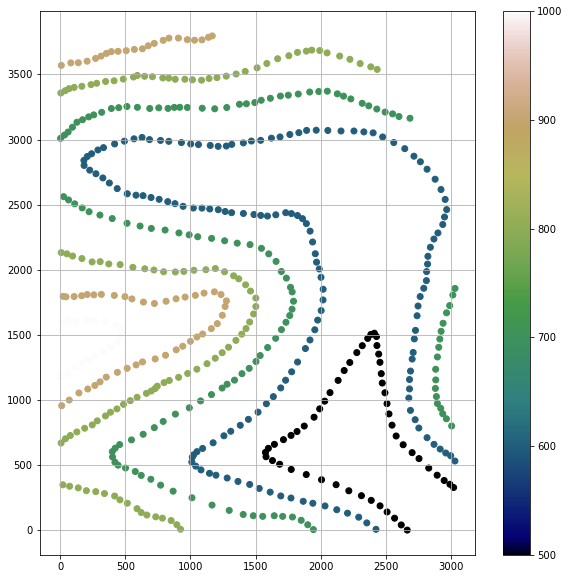

In [6]:
# Plot the contours
fix, ax = plt.subplots(1, figsize=(10, 10))
topo.plot(ax=ax,aspect='equal',column='Z', cmap='gist_earth', legend=True)
plt.grid()

In [7]:
# Interpolate contour lines to make DEM
topo_raster = gg.vector.interpolate_raster(gdf=topo,value='Z',method='rbf',res=5)

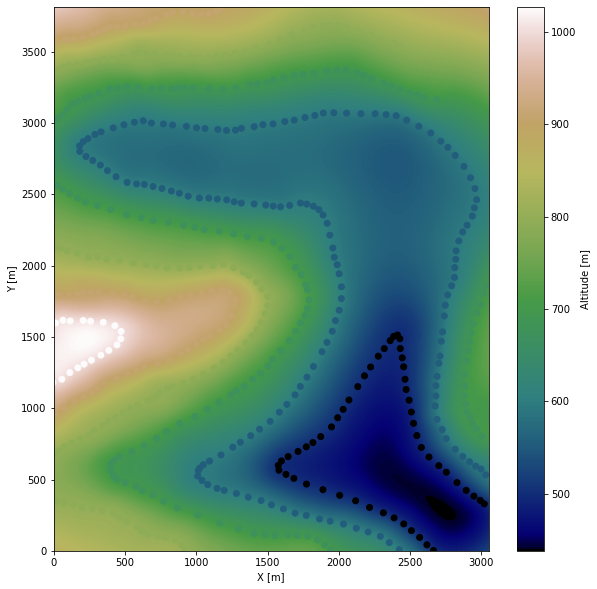

In [8]:
# Plot the DEM
fix, ax = plt.subplots(1, figsize=(10, 10))
topo.plot(ax=ax, aspect='equal', column='Z', cmap='gist_earth')
im = plt.imshow(topo_raster, origin='lower', extent=[0, 3051, 0, 3813], cmap='gist_earth')
cbar = plt.colorbar(im)
cbar.set_label('Altitude [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]');

In [9]:
# Save the DEM as a tif file
gg.raster.save_as_tiff(raster=topo_raster, path='dem_map6.tif', 
                       extent=[0, 3051, 0, 3813], crs='EPSG:4326', overwrite_file=True)

Raster successfully saved


In [10]:
# Open the DEM from tif file
topo_raster = rasterio.open('dem_map6.tif')

In [11]:
# Read the points on the contacts. These are the bases of the units and the fault
contacts = gpd.read_file(current_directory+'/contacts/contacts.shp')
contacts.head()

,X,Y,formation,geometry
0,1513.34,3379.21,B,POINT (1513.338 3379.212)
1,1153.08,2535.07,B,POINT (1153.083 2535.065)
2,1539.21,1453.44,B,POINT (1539.209 1453.444)
3,2145.55,413.20,B,POINT (2145.546 413.201)
4,1122.31,3414.52,A,POINT (1122.313 3414.521)


In [12]:
# Extract the Z coordinate of the points at the contacts
contacts_with_Z = gg.vector.extract_xyz(gdf=contacts, dem=topo_raster)
contacts_with_Z

,X,Y,formation,geometry,Z
0,1513.34,3379.21,B,POINT (1513.338 3379.212),726.96
1,1153.08,2535.07,B,POINT (1153.083 2535.065),587.61
2,1539.21,1453.44,B,POINT (1539.209 1453.444),733.58
3,2145.55,413.20,B,POINT (2145.546 413.201),477.88
4,1122.31,3414.52,A,POINT (1122.313 3414.521),775.95
5,786.36,2418.90,A,POINT (786.364 2418.897),653.95
6,1098.24,1183.01,A,POINT (1098.244 1183.012),765.40
7,1777.08,386.25,A,POINT (1777.080 386.254),528.62
8,3032.88,1051.38,F,POINT (3032.884 1051.376),708.14
9,2833.79,1040.12,F,POINT (2833.794 1040.116),681.51


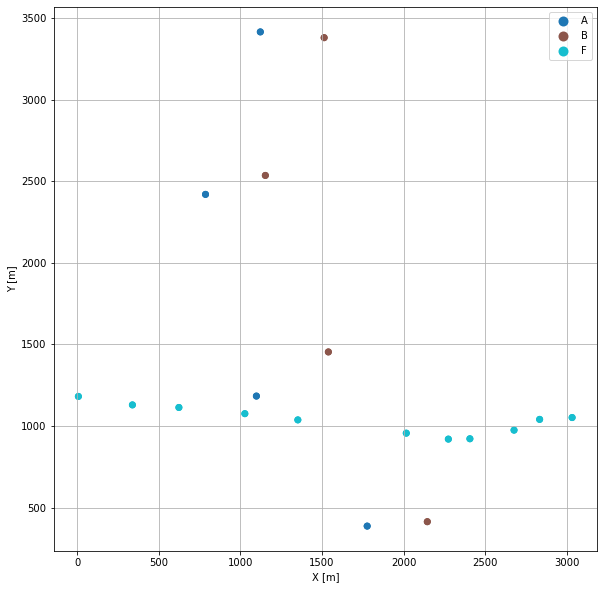

In [13]:
# Plot the points on the contacts, F stands for "fault"
fig, ax = plt.subplots(1, figsize=(10, 10))
contacts.plot(ax=ax, column='formation', legend=True, aspect='equal')
contacts_with_Z.plot(ax=ax, column='formation', legend=True, aspect='equal')
plt.grid()
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]');

In [14]:
# Read the strike lines on both base B and the fault
gdf = gpd.read_file(current_directory+'/strike_lines/strike_lines.shp')
gdf

,X,Y,Z,formation,id,geometry
0,1201.37,2464.15,600,B,1,POINT (1201.367 2464.154)
1,1180.32,2952.93,600,B,1,POINT (1180.320 2952.929)
2,1423.78,2193.59,700,B,2,POINT (1423.779 2193.594)
3,1429.73,3273.28,700,B,2,POINT (1429.733 3273.284)
4,2007.41,953.37,500,F,3,POINT (2007.412 953.373)
5,2509.66,936.67,500,F,3,POINT (2509.661 936.666)
6,2681.61,981.07,600,F,4,POINT (2681.605 981.067)
7,1605.46,998.41,600,F,4,POINT (1605.464 998.412)
8,2883.72,1047.40,700,F,5,POINT (2883.717 1047.404)
9,1181.39,1059.32,700,F,5,POINT (1181.394 1059.320)


In [15]:
# Convert the points into strike lines
linestring_gdf_B = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'B'])
linestring_gdf_F = gg.vector.create_linestring_gdf(gdf=gdf[gdf['formation'] == 'F'])

In [16]:
# Check that the strike lines are valid
linestring_gdf_B.is_valid

0    True
1    True
dtype: bool

In [17]:
linestring_gdf_F.is_valid

0    True
1    True
2    True
dtype: bool

In [18]:
#Calculate orientations of base B
orientations_B = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_B)
orientations_B

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,24.07,269.84,650.00,POINT (1308.800 2720.990),1.00,1308.80,2720.99,B


In [19]:
# Calculate orientations of fault
orientations_F = gg.vector.calculate_orientations_from_strike_lines(gdf=linestring_gdf_F)
orientations_F

,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,68.92,181.10,550.00,POINT (2201.035 967.380),1.00,2201.04,967.38,F
1,59.91,180.55,650.00,POINT (2088.045 1021.551),1.00,2088.05,1021.55,F


Base B and in fact A-C dip 24 degrees to the west. The fault dips 60-70 degrees to the south. The fault puts in contact older units (e.g. B) in the footwall, against younger units (e.g. C) in the hanging wall. Therefore, the downthrown block is the southern block (hanging wall), and this is a normal fault.

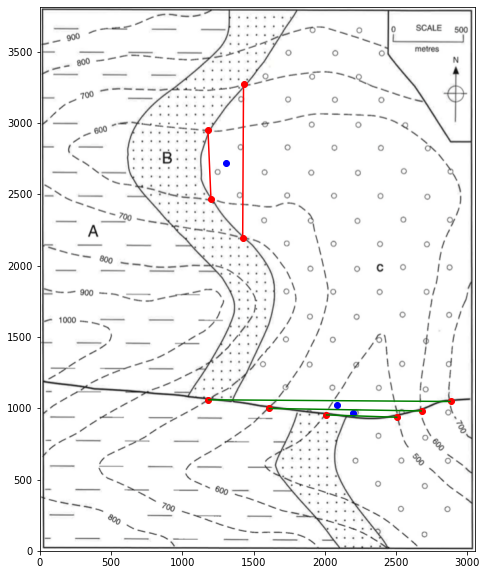

In [20]:
# Plot all this information on the map, so we can better understand this structure
fig, ax = plt.subplots(1,1,figsize=(10, 10))
ax.imshow(img, extent=[0, 3051, 0, 3813], cmap='gray')
# plot points
gdf.plot(ax=ax, aspect='equal', color='red')
# plot strike lines
# base B
linestring_gdf_B.plot(ax=ax, aspect='equal', color='red') 
orientations_B.plot(ax=ax, aspect='equal', color='blue')
# fault
linestring_gdf_F.plot(ax=ax, aspect='equal', color='green') 
orientations_F.plot(ax=ax, aspect='equal', color='blue');

In [21]:
# Merge orientations
import pandas as pd
orientations = pd.concat([orientations_B, orientations_F]).reset_index()
orientations

,index,dip,azimuth,Z,geometry,polarity,X,Y,formation
0,0,24.07,269.84,650.00,POINT (1308.800 2720.990),1.00,1308.80,2720.99,B
1,0,68.92,181.10,550.00,POINT (2201.035 967.380),1.00,2201.04,967.38,F
2,1,59.91,180.55,650.00,POINT (2088.045 1021.551),1.00,2088.05,1021.55,F


# Construction of the model in GemPy

In [22]:
# Import GemPy
import gempy as gp

In [23]:
# Create a geomodel object called model6
geo_model = gp.create_model('model6')

In [24]:
# Define model extent, resolution, surface points, and orientations
gp.init_data(geo_model, [0, 3051, 0, 3813, 0, 1000], [100, 100, 100],
             surface_points_df=contacts_with_Z,
             orientations_df=orientations, default_values=True);

Active grids: ['regular']


In [25]:
# Check default series
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,B,Default series,1,#015482,1
1,A,Default series,2,#9f0052,2
2,F,Default series,3,#ffbe00,3


In [26]:
# The base of the lowermost unit C does not outcrop in the map
# This unit is our "basement", we add it manually
geo_model.add_surfaces('C')

# The surfaces are divided into 2 series
# Strata = units A-C, Fault = the fault
gp.map_stack_to_surfaces(geo_model,{'Fault': ('F'),'Strata': ('A','B', 'C'),},
                         remove_unused_series=True)

# Tell GemPy that the series Fault is a fault
geo_model.set_is_fault(['Fault'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault,1,Fault,True,True,False
Strata,2,Erosion,True,False,False


In [27]:
# Check that the data are correct
gg.utils.show_number_of_data_points(geo_model=geo_model)

,surface,series,order_surfaces,color,id,No. of Interfaces,No. of Orientations
2,F,Fault,1,#527682,1,11,2
0,B,Strata,1,#015482,2,4,1
1,A,Strata,2,#9f0052,3,4,0
3,C,Strata,3,#728f02,4,0,0


In [28]:
# Set the topography of the model
geo_model.set_topography(source='gdal',filepath='dem_map6.tif');

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


In [29]:
# Plot the points on the contacts and topography in 3D 
# This will open a PyVista window. This may take some time, please wait
from pyvistaqt import BackgroundPlotter
gp.plot_3d(geo_model, plotter_type='background',show_topography=True);

In [30]:
# Now we have enough data to interpolate. This may take some time, please wait
gp.set_interpolator(geo_model, compile_theano=True, 
                    theano_optimizer='fast_compile');

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                    values
range             4984.73
$C_o$           591608.81
drift equations    [3, 3]


In [31]:
# Ignore warnings from np
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# Compute the geological model. This may take some time, please wait
gp.compute_model(geo_model);

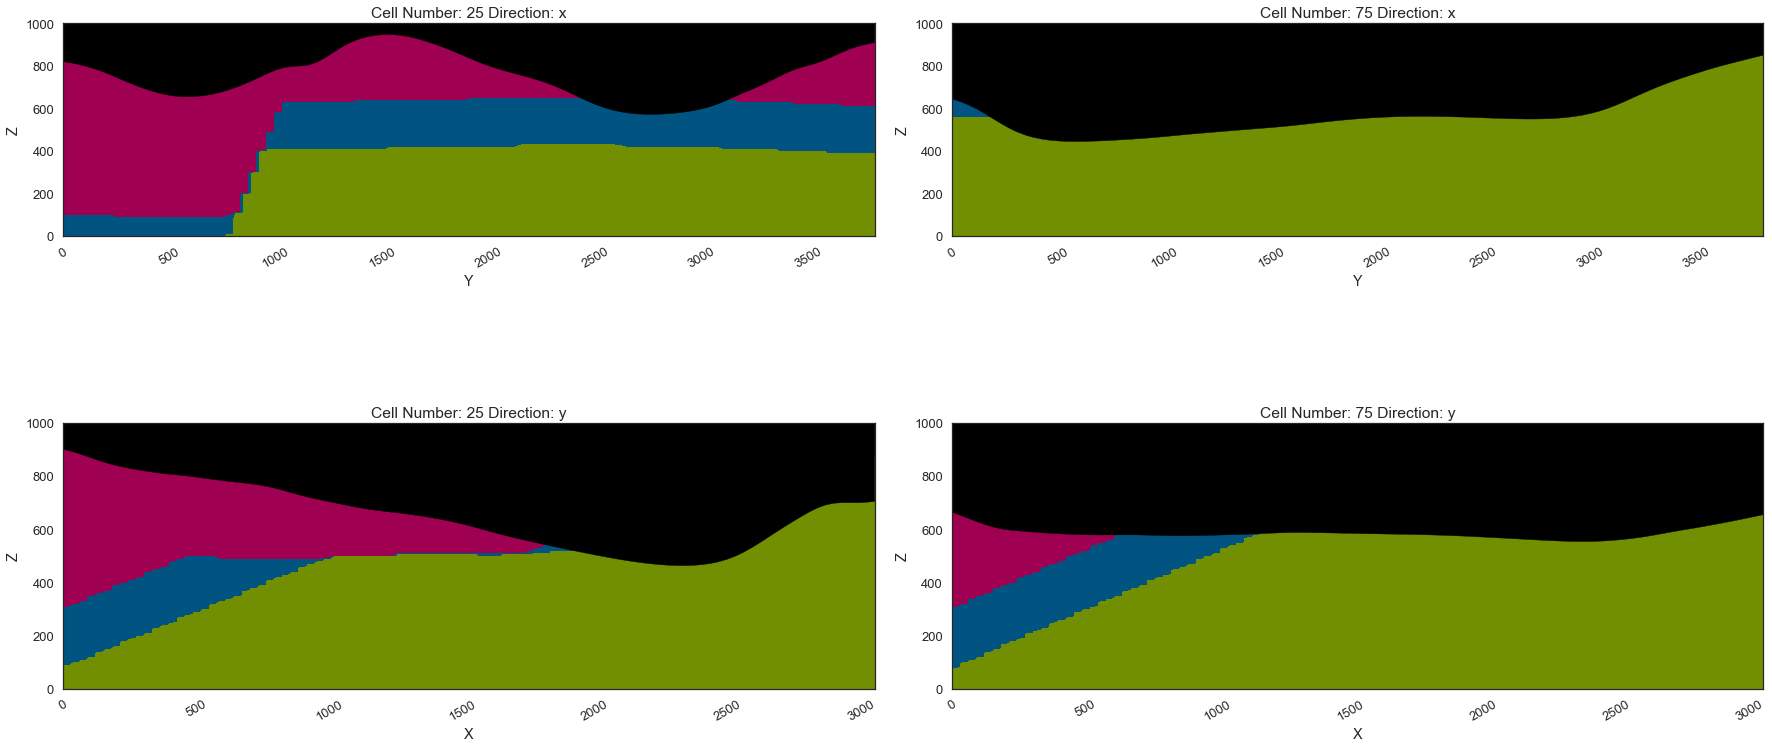

In [32]:
# Plot north-south and east-west sections without vertical exaggeration
gp.plot_2d(geo_model, direction=['x', 'x', 'y', 'y'], cell_number=[25, 75, 25, 75], 
           show_data=False, show_boundaries=False, show_topography=True, show=False);

In [33]:
# Plot the geomodel in 3D, this will open a PyVista window. This may take some time, please wait
gp.plot_3d(geo_model, plotter_type='background', show_topography=True, show_lith=False);